In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-data-nifty-100-stocks-15-min-data/IRFC_15minute.csv
/kaggle/input/stock-market-data-nifty-100-stocks-15-min-data/ADANIENSOL_15minute.csv
/kaggle/input/stock-market-data-nifty-100-stocks-15-min-data/ASIANPAINT_15minute.csv
/kaggle/input/stock-market-data-nifty-100-stocks-15-min-data/HCLTECH_15minute.csv
/kaggle/input/stock-market-data-nifty-100-stocks-15-min-data/DRREDDY_15minute.csv
/kaggle/input/stock-market-data-nifty-100-stocks-15-min-data/BAJAJHLDNG_15minute.csv
/kaggle/input/stock-market-data-nifty-100-stocks-15-min-data/TRENT_15minute.csv
/kaggle/input/stock-market-data-nifty-100-stocks-15-min-data/TITAN_15minute.csv
/kaggle/input/stock-market-data-nifty-100-stocks-15-min-data/ONGC_15minute.csv
/kaggle/input/stock-market-data-nifty-100-stocks-15-min-data/ABB_15minute.csv
/kaggle/input/stock-market-data-nifty-100-stocks-15-min-data/SIEMENS_15minute.csv
/kaggle/input/stock-market-data-nifty-100-stocks-15-min-data/PNB_15minute.csv
/kaggle/input/stock-marke

/tmp/ipykernel_13/1261596897.py:40: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)
/tmp/ipykernel_13/1261596897.py:40: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)
/tmp/ipykernel_13/1261596897.py:40: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-con

Loaded total 6057142 samples across 102 files.


/tmp/ipykernel_13/1261596897.py:67: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  bar_timestamps = pd.to_datetime(bar_timestamps, errors='coerce', infer_datetime_format=True)


Train period: 2021–Jul 2024 → 2153233 samples
Test period: Aug 2024–Aug 2025 → 630684 samples
Model training complete.


/tmp/ipykernel_13/1261596897.py:168: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  nifty['date'] = pd.to_datetime(nifty['date'], errors='coerce', infer_datetime_format=True)



📈 NIFTY 100 Benchmark Return for 2024: 11.89%


------ Long+Short No Cost (k=7) ------
Final Capital: ₹457,418.09
Total Return: 357.42%
Sharpe Ratio: 8.770
Sortino Ratio: 11.812
Max Drawdown: -7.01%
Winning Trades: 56.16% (6229 bar-level entries)
Avg Win: 0.154%, Avg Loss: -0.141%
Total Positions Opened (actual trades counted): 87,206


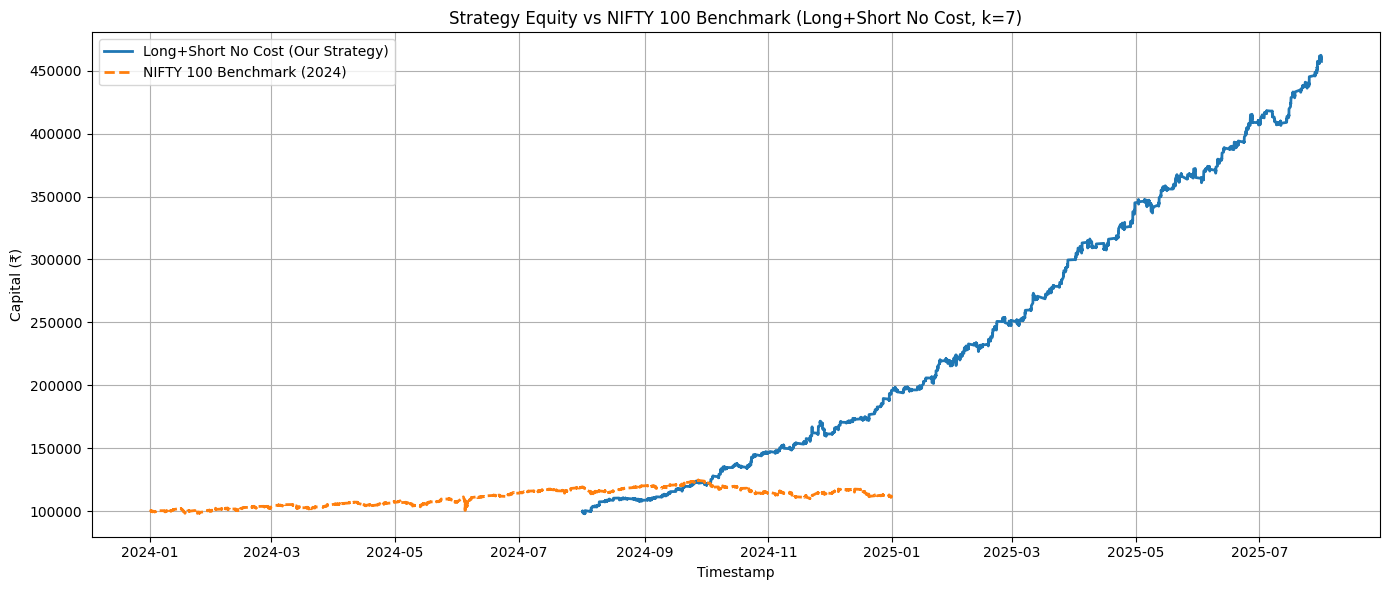

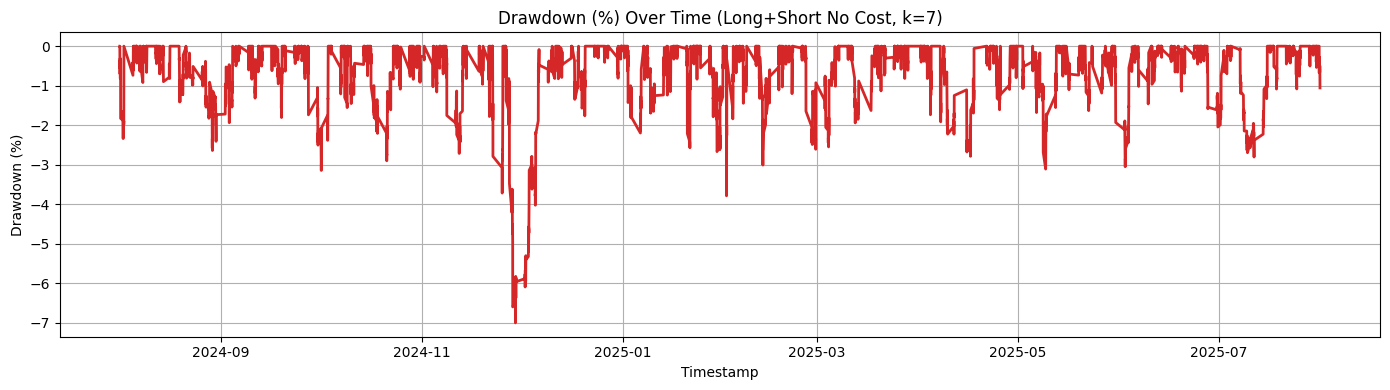


------ Long Only No Cost (k=7) ------
Final Capital: ₹215,082.36
Total Return: 115.08%
Sharpe Ratio: 4.250
Sortino Ratio: 5.596
Max Drawdown: -9.16%
Winning Trades: 53.51% (6229 bar-level entries)
Avg Win: 0.156%, Avg Loss: -0.152%
Total Positions Opened (actual trades counted): 43,603


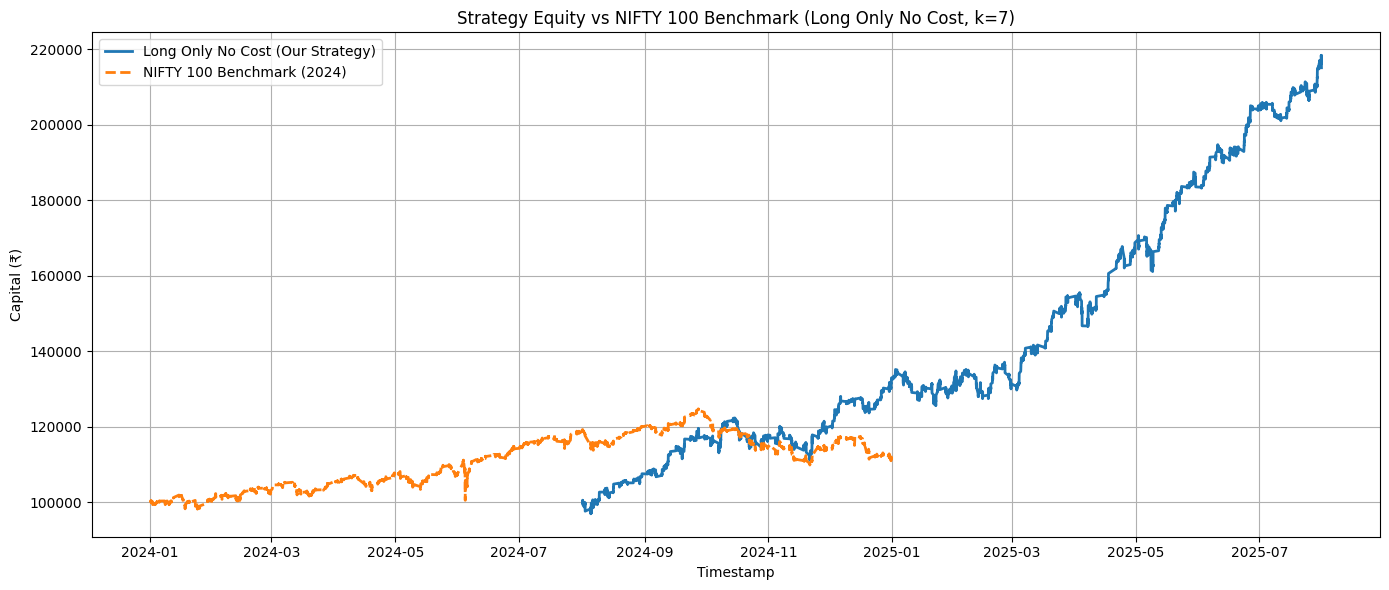

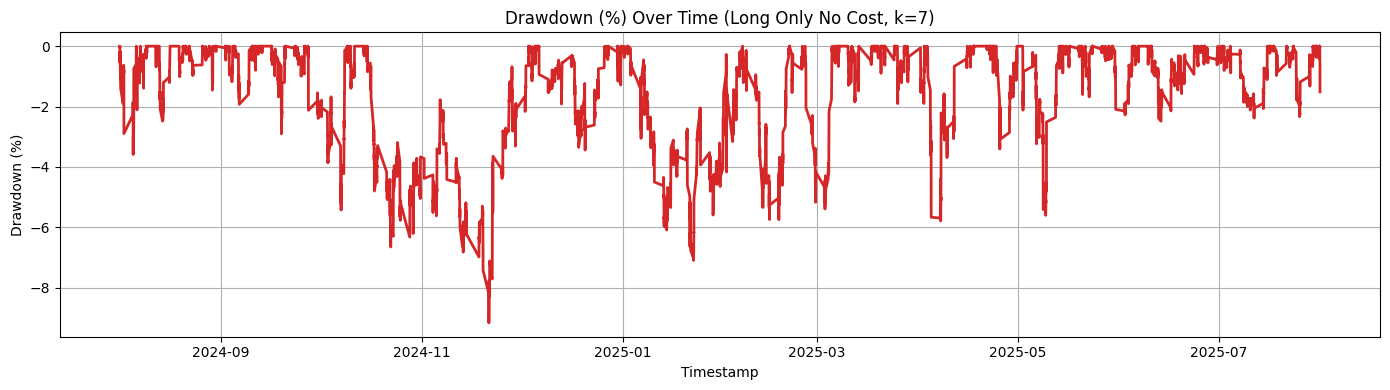


------ Long+Short With Cost (k=7) ------
Final Capital: ₹131,627.26
Total Return: 31.63%
Sharpe Ratio: 1.660
Sortino Ratio: 2.272
Max Drawdown: -9.29%
Winning Trades: 50.79% (6229 bar-level entries)
Avg Win: 0.149%, Avg Loss: -0.145%
Total Positions Opened (actual trades counted): 87,206


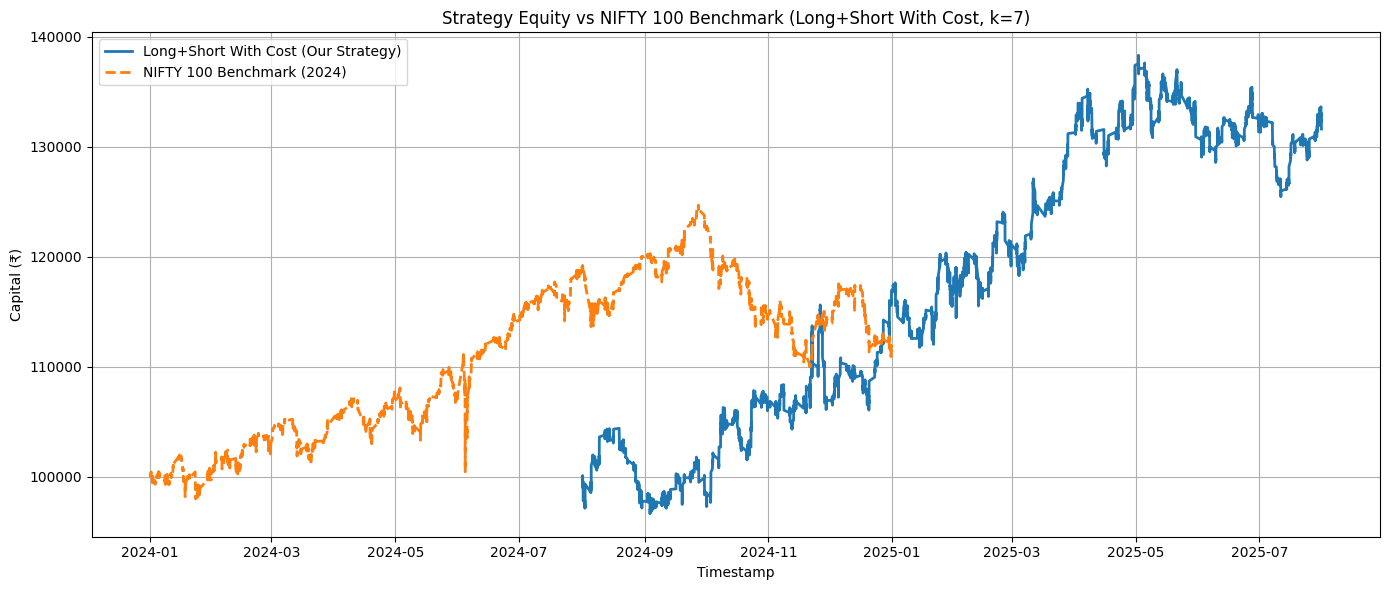

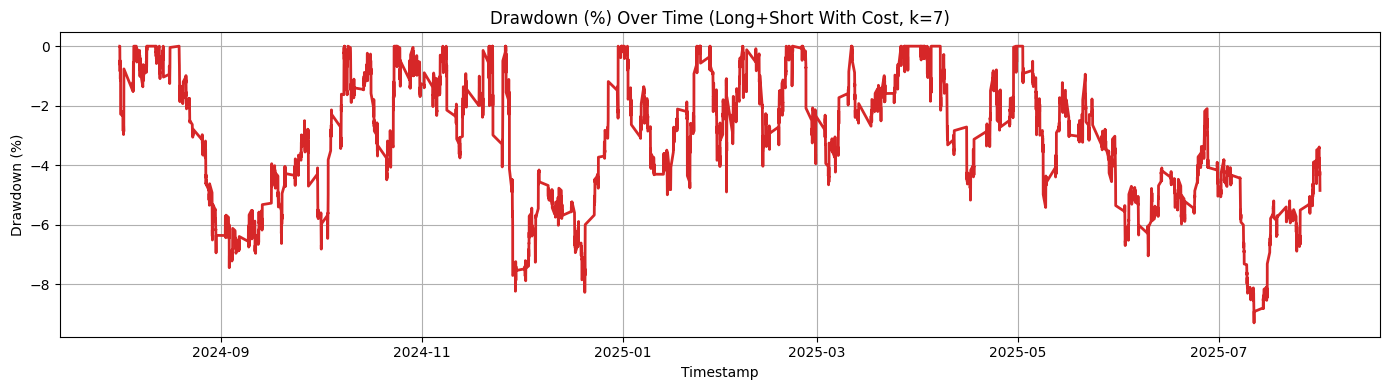


------ Long Only With Cost (k=7) ------
Final Capital: ₹115,372.34
Total Return: 15.37%
Sharpe Ratio: 0.872
Sortino Ratio: 1.159
Max Drawdown: -16.73%
Winning Trades: 50.49% (6229 bar-level entries)
Avg Win: 0.155%, Avg Loss: -0.153%
Total Positions Opened (actual trades counted): 43,603


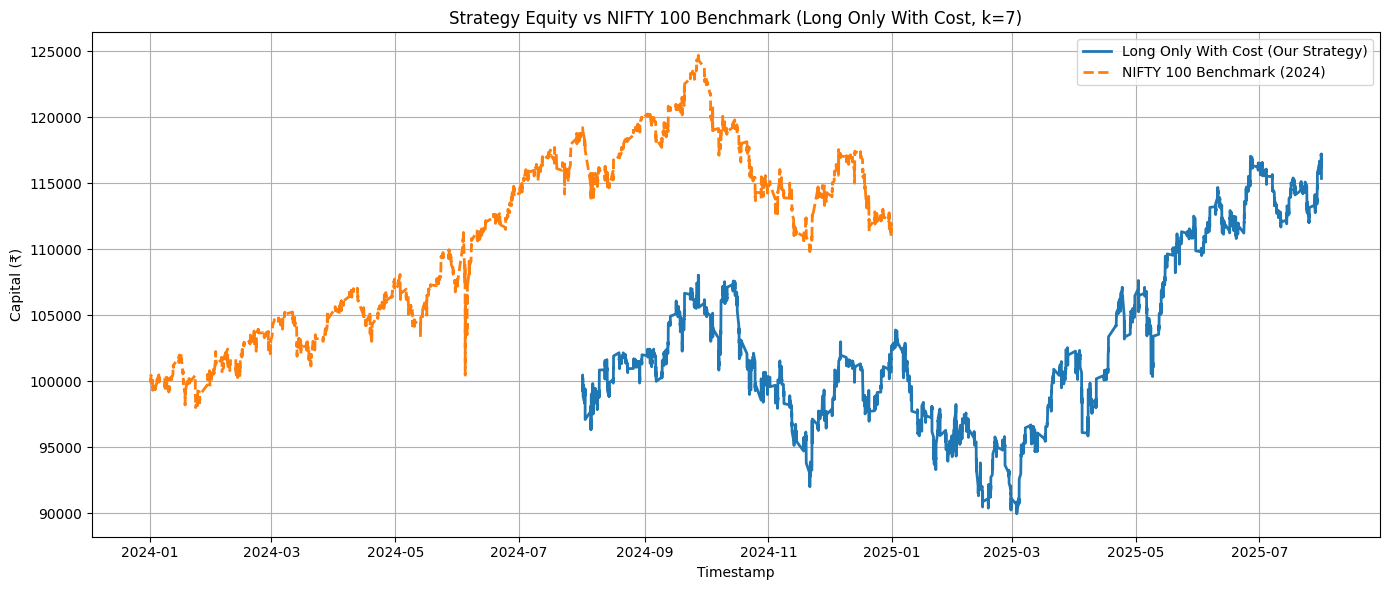

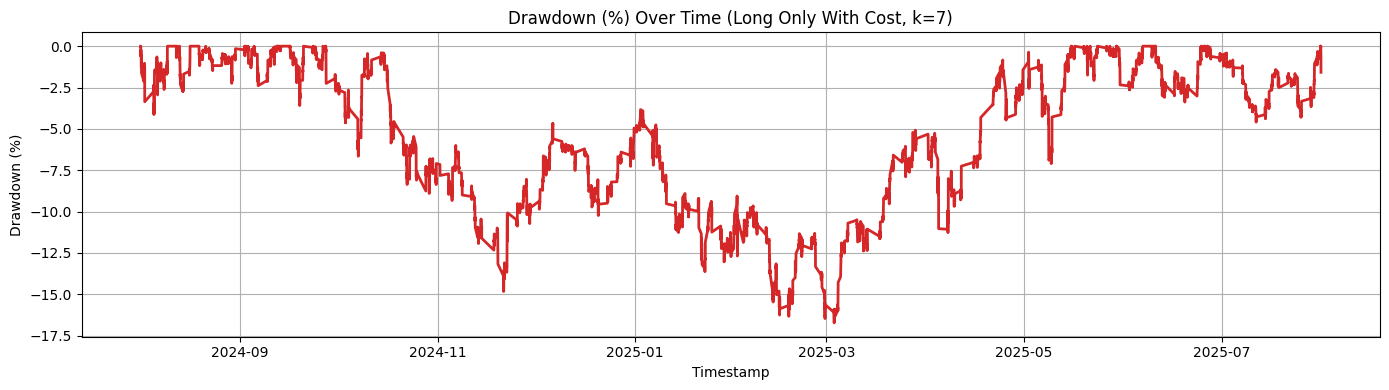

In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# --- Settings ---
SEED = 9
np.random.seed(SEED)
INITIAL_CAPITAL = 100_000

# --- Folder containing your CSV files ---
DATA_FOLDER = '/kaggle/input/stock-market-data-nifty-100-stocks-15-min-data'
CSV_LIST = [x for x in os.listdir(DATA_FOLDER) if x.endswith('.csv') and 'NIFTY 100' not in x]

BAR_LOOKBACKS = list(range(1, 20)) + list(range(20, 241, 20))  # 1–19, 20, 40, ..., 240


# --- Feature creation ---
def create_features(df):
    df = df.sort_values('date').reset_index(drop=True)
    df['return_next_bar'] = df['close'].pct_change().shift(-1)
    for k in BAR_LOOKBACKS:
        df[f'IntraR{k}'] = df['close'].pct_change(k)
        df[f'OverNR{k}'] = df['open'] / df['close'].shift(k) - 1
    df = df.dropna().reset_index(drop=True)
    df['label'] = (df['return_next_bar'] > 0).astype(int)
    features = [f'IntraR{k}' for k in BAR_LOOKBACKS] + [f'OverNR{k}' for k in BAR_LOOKBACKS]
    return df, features


# --- Load and combine all stocks ---
X_list, y_list, stock_ids, bar_timestamps, returns = [], [], [], [], []
for filename in CSV_LIST:
    df = pd.read_csv(os.path.join(DATA_FOLDER, filename))
    if not {'date', 'open', 'close'}.issubset(df.columns):
        print(f"Skipping {filename}: missing required columns.")
        continue

    df['date'] = pd.to_datetime(df['date'], errors='coerce', infer_datetime_format=True)
    df = df.dropna(subset=['date'])
    df, feat_list = create_features(df)
    if len(df) < 250:
        continue

    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(subset=feat_list + ['label', 'return_next_bar'], inplace=True)
    df[feat_list] = df[feat_list].clip(lower=-100, upper=100)

    stock = os.path.splitext(filename)[0]
    X_list.append(df[feat_list].values)
    y_list.append(df['label'].values)
    stock_ids.extend([stock] * len(df))
    bar_timestamps.append(df['date'].values)
    returns.append(df['return_next_bar'].values)

X = np.concatenate(X_list)
y = np.concatenate(y_list)
stock_ids = np.array(stock_ids)
bar_timestamps = np.concatenate(bar_timestamps)
returns = np.concatenate(returns)

print(f"Loaded total {len(X)} samples across {len(CSV_LIST)} files.")


# --- Calendar split (Train: 2021–Jul 2024, Test: Aug 2024–Aug 2025) ---
bar_timestamps = pd.to_datetime(bar_timestamps, errors='coerce', infer_datetime_format=True)

train_mask = (bar_timestamps >= pd.Timestamp('2021-01-01')) & (bar_timestamps < pd.Timestamp('2024-08-01'))
test_mask = (bar_timestamps >= pd.Timestamp('2024-08-01')) & (bar_timestamps <= pd.Timestamp('2025-08-01'))

X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]
ts_test = bar_timestamps[test_mask]
stock_test = stock_ids[test_mask]
returns_test = returns[test_mask]

print(f"Train period: 2021–Jul 2024 → {train_mask.sum()} samples")
print(f"Test period: Aug 2024–Aug 2025 → {test_mask.sum()} samples")

# --- Train model ---
clf = RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=-1, random_state=SEED)
clf.fit(X_train, y_train)
print("Model training complete.")


# --- Predict on test (2024–2025) ---
probs_test = clf.predict_proba(X_test)[:, 1]
results = pd.DataFrame({
    'timestamp': ts_test,
    'stock': stock_test,
    'prob_up': probs_test,
    'return_next_bar': returns_test
}).sort_values('timestamp').reset_index(drop=True)


# --- Simulation function ---
def simulate_strategy(results, txn_cost=0.0, k=2, long_only=False):
    capital = INITIAL_CAPITAL
    capitals, bar_returns, timestamps = [], [], []
    total_trades = 0  # count positions opened (longs + shorts) across all bars

    for ts, group in results.groupby('timestamp'):
        if len(group) < (k * (2 if not long_only else 1)):
            continue

        longs = group.nlargest(k, 'prob_up').copy()
        longs['position'] = 1

        if not long_only:
            shorts = group.nsmallest(k, 'prob_up').copy()
            shorts['position'] = -1
            sel = pd.concat([longs, shorts])
        else:
            sel = longs

        sel['pnl_pct'] = sel['position'] * sel['return_next_bar']
        sel['pnl_pct_adj'] = sel['pnl_pct'] - txn_cost * np.abs(sel['position'])

        # count positions opened this bar
        total_trades += len(sel)

        # ✅ ORIGINAL total_pnl logic preserved
        long_pnl = (capital / k) * sel.loc[sel['position'] == 1, 'pnl_pct_adj'].sum()
        short_pnl = (capital / k) * sel.loc[sel['position'] == -1, 'pnl_pct_adj'].sum() if not long_only else 0
        total_pnl = long_pnl + short_pnl

        bar_ret = total_pnl / capital
        capital += total_pnl

        capitals.append(capital)
        bar_returns.append(bar_ret)
        timestamps.append(ts)

    summary_df = pd.DataFrame({'timestamp': timestamps, 'capital': capitals, 'bar_return': bar_returns})
    return summary_df, total_trades


# --- Metrics ---
def compute_metrics(summary, total_trades):
    bars_per_day = 26
    days_per_year = 252
    bars_per_year = bars_per_day * days_per_year

    mean_ret = summary['bar_return'].mean() if len(summary) else 0.0
    std_ret = summary['bar_return'].std(ddof=0) if len(summary) else 0.0
    neg_std = summary.loc[summary['bar_return'] < 0, 'bar_return'].std(ddof=0) if (summary['bar_return'] < 0).any() else 0.0
    sharpe = (mean_ret / std_ret * np.sqrt(bars_per_year)) if std_ret > 0 else 0
    sortino = (mean_ret / neg_std * np.sqrt(bars_per_year)) if neg_std > 0 else 0

    total_return = (summary['capital'].iloc[-1] / INITIAL_CAPITAL - 1) * 100 if len(summary) else 0.0
    roll_max = summary['capital'].cummax() if len(summary) else pd.Series([INITIAL_CAPITAL])
    drawdown = summary['capital'] / roll_max - 1 if len(summary) else pd.Series([0.0])
    max_dd = drawdown.min() * 100 if len(drawdown) else 0.0

    # win/loss computation
    win_trades = (summary['bar_return'] > 0).sum() if len(summary) else 0
    loss_trades = (summary['bar_return'] < 0).sum() if len(summary) else 0
    win_pct = 100 * win_trades / (win_trades + loss_trades) if (win_trades + loss_trades) > 0 else 0.0
    avg_win = summary.loc[summary['bar_return'] > 0, 'bar_return'].mean() * 100 if (summary['bar_return'] > 0).any() else 0.0
    avg_loss = summary.loc[summary['bar_return'] < 0, 'bar_return'].mean() * 100 if (summary['bar_return'] < 0).any() else 0.0

    return total_return, sharpe, sortino, max_dd, win_pct, (win_trades + loss_trades), avg_win, avg_loss, total_trades


# --- ✅ Fixed NIFTY 100 Benchmark (2024 only) ---
nifty = pd.read_csv(os.path.join(DATA_FOLDER, 'NIFTY 100_15minutedata.csv'))
nifty['date'] = pd.to_datetime(nifty['date'], errors='coerce', infer_datetime_format=True)
nifty = nifty.sort_values('date')
nifty['return'] = nifty['close'].pct_change()

# Keep only 2024 data and reset benchmark from start of 2024
nifty_2024 = nifty.loc[nifty['date'].dt.year == 2024].copy()
nifty_2024['return'] = nifty_2024['return'].fillna(0)
nifty_2024['capital'] = INITIAL_CAPITAL * (1 + nifty_2024['return']).cumprod()
nifty = nifty_2024[['date', 'capital']].reset_index(drop=True)

# ✅ Print benchmark performance
nifty_return = (nifty['capital'].iloc[-1] / nifty['capital'].iloc[0] - 1) * 100
print(f"\n📈 NIFTY 100 Benchmark Return for 2024: {nifty_return:.2f}%\n")


# --- Run 4 Cases ---
k = 7

cases = [
    ("Long+Short No Cost", 0.0, False),
    ("Long Only No Cost", 0.0, True),
    ("Long+Short With Cost", 0.0001, False),
    ("Long Only With Cost", 0.0001, True),
]

for name, cost, long_only in cases:
    summary, total_trades = simulate_strategy(results, txn_cost=cost, k=k, long_only=long_only)
    total_return, sharpe, sortino, max_dd, win_pct, trades_barlevel, avg_win, avg_loss, total_trades_returned = compute_metrics(summary, total_trades)

    print(f"\n------ {name} (k={k}) ------")
    print(f"Final Capital: ₹{summary['capital'].iloc[-1]:,.2f}")
    print(f"Total Return: {total_return:.2f}%")
    print(f"Sharpe Ratio: {sharpe:.3f}")
    print(f"Sortino Ratio: {sortino:.3f}")
    print(f"Max Drawdown: {max_dd:.2f}%")
    print(f"Winning Trades: {win_pct:.2f}% ({trades_barlevel} bar-level entries)")
    print(f"Avg Win: {avg_win:.3f}%, Avg Loss: {avg_loss:.3f}%")
    print(f"Total Positions Opened (actual trades counted): {total_trades_returned:,}")

    # --- Plot Strategy vs Benchmark (NIFTY 2024 only) ---
    plt.figure(figsize=(14, 6))
    plt.plot(summary['timestamp'], summary['capital'], label=f'{name} (Our Strategy)', lw=2)
    plt.plot(nifty['date'], nifty['capital'], label='NIFTY 100 Benchmark (2024)', lw=2, linestyle='--')
    plt.title(f'Strategy Equity vs NIFTY 100 Benchmark ({name}, k={k})')
    plt.xlabel('Timestamp')
    plt.ylabel('Capital (₹)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Drawdown plot (percentage) ---
    roll_max = summary['capital'].cummax()
    drawdown_pct = (summary['capital'] / roll_max - 1.0) * 100.0
    plt.figure(figsize=(14, 4))
    plt.plot(summary['timestamp'], drawdown_pct, label=f'Drawdown (%) - {name}', lw=2, color='tab:red')
    plt.title(f'Drawdown (%) Over Time ({name}, k={k})')
    plt.xlabel('Timestamp')
    plt.ylabel('Drawdown (%)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
